In [4]:
# !pip install mrcfile

In [5]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import os
import cv2

Shape of mrc file: (107, 155, 200)


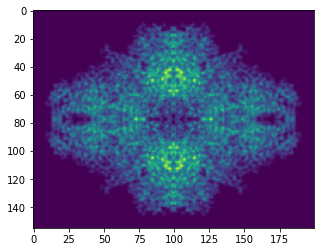

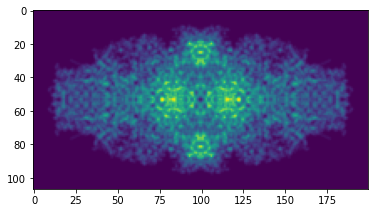

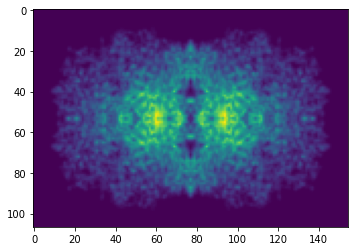

In [6]:
with mrcfile.open('3j7h/3j7h_res3.mrc') as mrc:
    print('Shape of mrc file: {}'.format(mrc.data.shape))
    plt.imshow(np.sum(mrc.data, axis=0)), plt.show()
    plt.imshow(np.sum(mrc.data, axis=1)), plt.show()
    plt.imshow(np.sum(mrc.data, axis=2)), plt.show()

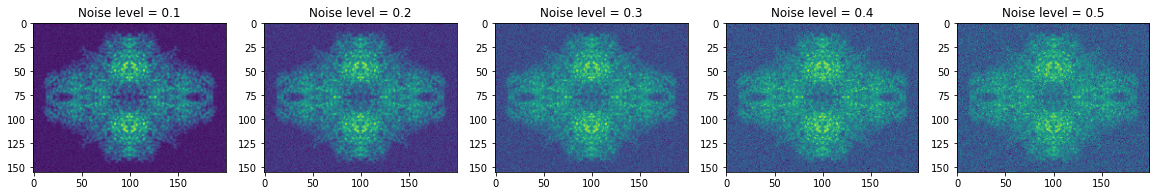

In [7]:
noisy = os.listdir('3j7h')[2:]

fig, axs = plt.subplots(1, 5, figsize=(20,3))

for label, file in enumerate(noisy):
    ax = axs[label]
    noise = (label + 1) /10
    file_name = os.path.join('3j7h', file, file) + '.mrc'
    with mrcfile.open(file_name) as mrc:
        ax.set_title('Noise level = {}'.format(noise))
        ax.imshow(np.sum(mrc.data, axis=0))
        
plt.show()

In [8]:
with mrcfile.open('3j7h/3j7h_res3.mrc') as mrc:
    frame_size = mrc.data.shape[1:][::-1]
    fps = 10
    out = cv2.VideoWriter('3j7h_avi/3j7h_res3.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, frame_size, False)
    
    # normalize frames to have values between 0 and 1
    frames = mrc.data.copy() / np.max(mrc.data)
    frames_scaled = (frames * 255).astype(np.uint8)
    
    for frame in frames_scaled:
        out.write(frame)
        
    out.release()

In [9]:
def add_gaussian_noise(frames, sigma):
    return np.clip(frames + np.random.normal(0.0, sigma, size=frames.shape), 0.0, 1.0)

In [10]:
step = 0.05
noise_sigmas = np.arange(step, 0.55, step)
print(noise_sigmas)
np.random.seed(0)

all_noisy = {}

for sig in noise_sigmas:
    noisy = add_gaussian_noise(frames, sig)
    all_noisy[sig] = noisy
    noisy_scaled = (noisy * 255).astype(np.uint8)
    
    fname = '3j7h_avi/3j7h_res3_noisy_{:0.2f}.avi'.format(sig)
    out = cv2.VideoWriter(fname, cv2.VideoWriter_fourcc(*'DIVX'), fps, frame_size, False)
    print('writing to ' + str(fname))
        
    for frame in noisy_scaled:
        out.write(frame)
    out.release()
    
print('done')

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
writing to 3j7h_avi/3j7h_res3_noisy_0.05.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.10.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.15.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.20.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.25.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.30.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.35.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.40.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.45.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.50.avi
done


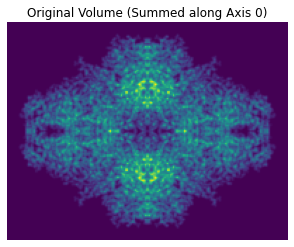

In [11]:
plt.title('Original Volume (Summed along Axis 0)', fontdict={'fontsize' : 12})
plt.imshow(np.sum(frames, axis=0))
plt.axis('off')
plt.savefig('original_3j7h_summed.jpg')
plt.show()

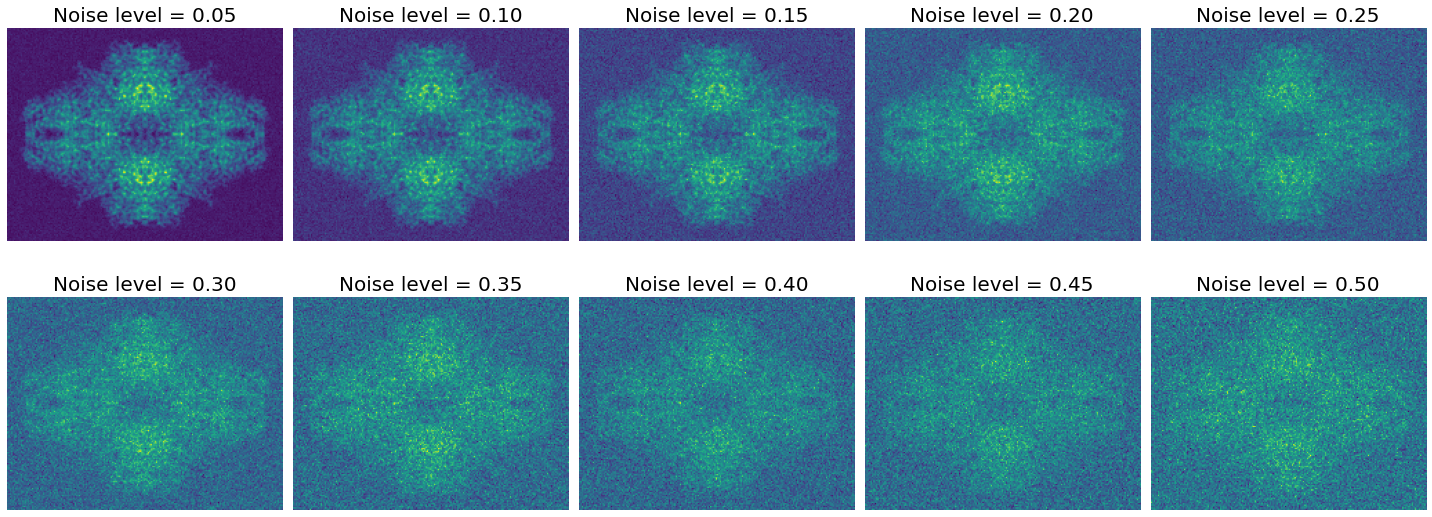

In [12]:
rows = 2
cols = int(len(all_noisy) / 2)
fig, axs = plt.subplots(rows, cols, figsize=(20,8), sharex=True, sharey=True)

for i, (label, noisy) in enumerate(all_noisy.items()):
    ax = axs[i // cols][i % cols]
    noise = label
    ax.set_axis_off()
    
    ax.set_title('Noise level = {:0.2f}'.format(label), fontdict={'fontsize' : 20})
    ax.imshow(np.sum(noisy, axis=0))
    
plt.tight_layout()

plt.savefig('noisy_3j7h_summed.jpg')
plt.show()

In [54]:
def crop_frames(frames, size=(50,50,50), offset=(0,0,0)):
    return frames[offset[0]:size[0]+offset[0], offset[1]:size[1]+offset[1], offset[2]:size[2]+offset[2]]
    

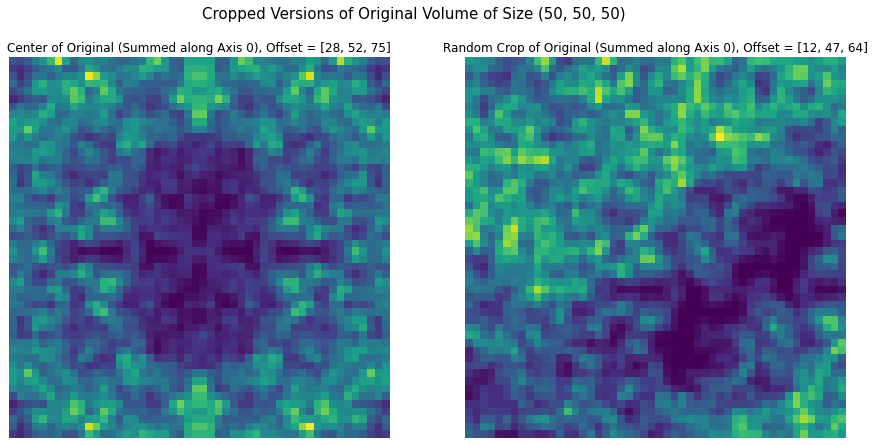

In [59]:
np.random.seed(0)

crop_size = (50, 50, 50)

center_offset = [int((frames.shape[i] - x) / 2) for i, x in enumerate(crop_size)]
frames_cropped_center = crop_frames(frames, size=crop_size, offset=center_offset)

random_offset = [np.random.randint(0, max_offset) for max_offset in center_offset]
frames_cropped_random = crop_frames(frames, size=crop_size, offset=random_offset)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

fig.suptitle('Cropped Versions of Original Volume of Size {}'.format(crop_size), fontsize=15)
ax = axs[0]
ax.set_title('Center of Original (Summed along Axis 0), Offset = {}'.format(center_offset), fontdict={'fontsize' : 12})
ax.imshow(np.sum(frames_cropped_center, axis=0))
ax.axis('off')

ax = axs[1]
ax.set_title('Random Crop of Original (Summed along Axis 0), Offset = {}'.format(random_offset), fontdict={'fontsize' : 12})
ax.imshow(np.sum(frames_cropped_random, axis=0))
ax.axis('off')

plt.savefig('original_3j7h_summed_cropped.jpg')
plt.show()

In [74]:
def save_noisy(frames, folder, label, step=0.05, fps=10):
    # save original volume as avi
    frame_size = frames.shape[1:][::-1]
    out = cv2.VideoWriter('{}/3j7h_{}_original.avi'.format(folder, label),cv2.VideoWriter_fourcc(*'DIVX'), fps, frame_size, False)
    
    # normalize frames to have values between 0 and 1
    frames_scaled = (frames * 255).astype(np.uint8)
    
    for frame in frames_scaled:
        out.write(frame)
    
    # save noisy volumes as avi
    noise_sigmas = np.arange(step, 0.55, step)
    np.random.seed(0)

    all_noisy = {}

    for sig in noise_sigmas:
        noisy = add_gaussian_noise(frames, sig)
        all_noisy[sig] = noisy
        noisy_scaled = (noisy * 255).astype(np.uint8)
        
        fname = '{}/3j7h_{}_noisy_{:0.2f}.avi'.format(folder, label, sig)
        out = cv2.VideoWriter(fname, cv2.VideoWriter_fourcc(*'DIVX'), fps, frame_size, False)
        print('writing to ' + str(fname))

        for frame in noisy_scaled:
            out.write(frame)
        out.release()

    print('done')
    
    # show results
    rows = 2
    cols = int(len(all_noisy) / 2)
    fig, axs = plt.subplots(rows, cols, figsize=(20,8), sharex=True, sharey=True)

    for i, (label, noisy) in enumerate(all_noisy.items()):
        ax = axs[i // cols][i % cols]
        noise = label
        ax.set_axis_off()

        ax.set_title('Noise level = {:0.2f}'.format(label), fontdict={'fontsize' : 20})
        ax.imshow(np.sum(noisy, axis=0))

    plt.tight_layout()

    plt.savefig('noisy_3j7h_{}_summed.jpg'.format(label))
    plt.show()

writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.05.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.10.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.15.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.20.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.25.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.30.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.35.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.40.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.45.avi
writing to 3j7h_cropped_center_avi/3j7h_center_noisy_0.50.avi
done


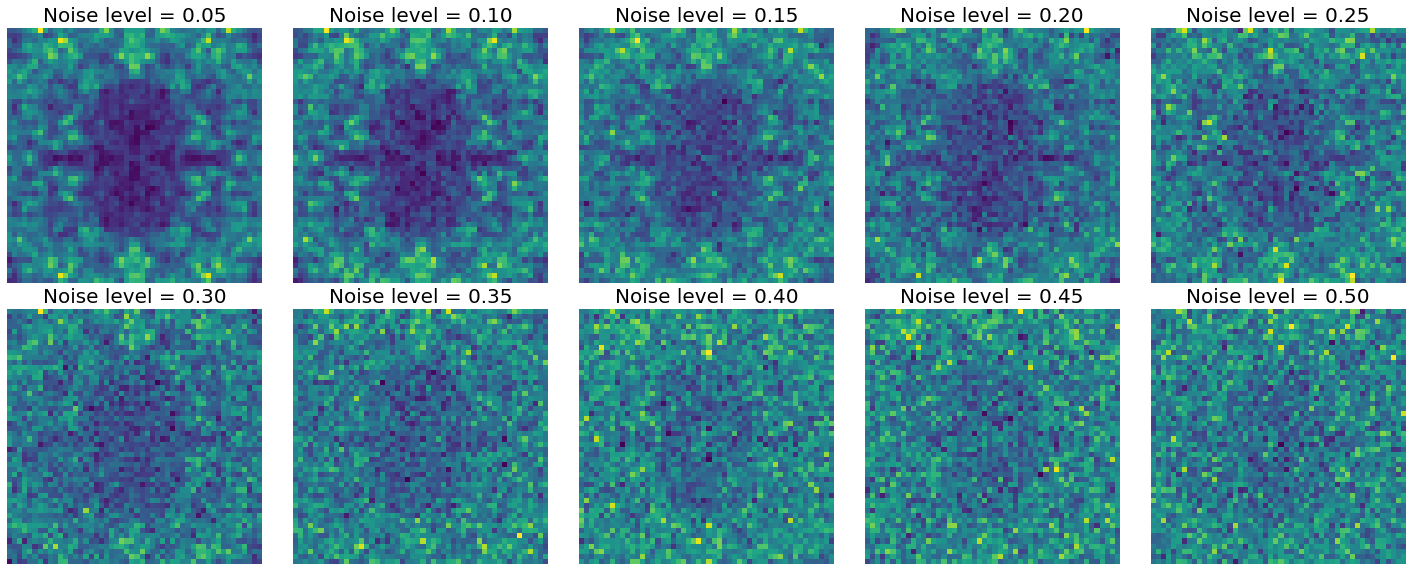

writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.05.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.10.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.15.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.20.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.25.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.30.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.35.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.40.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.45.avi
writing to 3j7h_cropped_random_avi/3j7h_random_noisy_0.50.avi
done


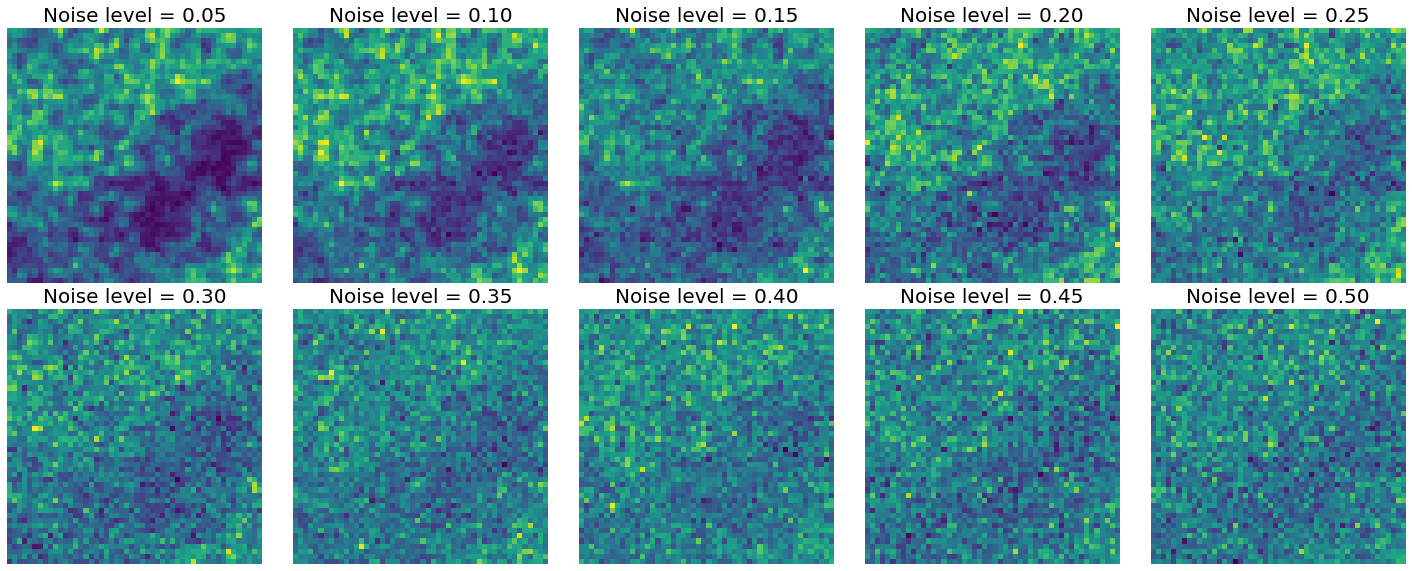

In [75]:
save_noisy(frames_cropped_center, folder='3j7h_cropped_center_avi', label='center')
save_noisy(frames_cropped_random, folder='3j7h_cropped_random_avi', label='random')